# kNN - own implementation

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

In [22]:
iris = load_iris()

In [23]:
X, y = iris.data, iris.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=100)

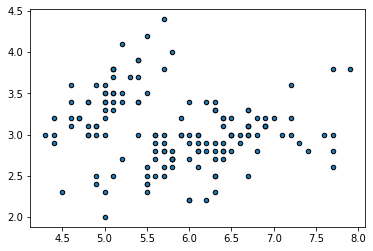

In [25]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=20)

In [26]:
X = (X - X.mean()) / X.std()

In [27]:
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
def predict(x_train, y , x_input, k):
    op_labels = []
     
    for item in x_input: 
        
        point_dist = []
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels    

In [28]:
y_pred = predict(X_train, y_train, X_test, 10)
accuracy_score(y_test, y_pred)

1.0

# kNN - Python ( sklearn )

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [31]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]


# Decision trees

In [35]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [36]:
clf.predict(iris.data[:1, :])


array([0])

In [37]:
clf.predict_proba(iris.data[:1, :])


array([[1., 0., 0.]])

In [40]:
import pydoc

In [41]:
from six import StringIO  
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")

NameError: name 'pydot' is not defined